In [19]:
import gixpy
import numpy as np
from pathlib import Path
import matplotlib.pylab as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import ScalarFormatter

img_dir = Path.cwd().parent / "paper" / "images"

help(gixpy.transform)

Help on built-in function transform in module gixpy_c:

transform(...)
    transform(data, flat_field, pixel_z, pixel_x, poni_z, poni_x, detector_distance, incident_angle, tilt_angle, critical_angle)

    Transform GIWAXS/GISAXS images.

    :param data: numpy.ndarray - NumPy array of X-ray image data.
    :param flat_field: numpy.ndarray - An array to keep track of the pixel movement. Give the image's flat-field image data, if it exists, or an array of ones, if not.
    :param pixel_z: float - The size of a pixel in the z-direction (in meters).
    :param pixel_x: float - The size of a pixel in the x-direction (in meters).
    :param poni_z: float - The distance from the bottom edge of the detector to the point of normal incidence (PONI) in the z-direction (in meters).
    :param poni_x: float - The distance from the left edge of the detector to the point of normal incidence (PONI) in the x-direction (in meters).
    :param detector_distance: float - The distance from the sample to th

# GIWAXS

In [20]:
flat_data = np.ones((2000, 3000))

pixel = 75e-6
poni1 = 0.05
poni2 = 0.1125
det_dist = 0.15
incident_angle = np.radians(.3)
tilt_angle = 0
critical_angle = 0

transformed_WAXS, _, new_poni = gixpy.transform(flat_data, flat_data, pixel, pixel, poni1, poni2,
                                                det_dist, incident_angle, tilt_angle, critical_angle, 0)

beam_center = gixpy.poni.convert_from(new_poni, pixel, transformed_WAXS.shape)
print(beam_center)

Loaded image and flat field with shape (2000, 3000).
Transformed beam center: (1277.68, 1581.06) pixels
Found new locations for pixels.
Output images will have shape (1936, 3164)
Initializing transformed image with dimension 2: (1936, 3164)
[1277.68181548 1581.05708163]


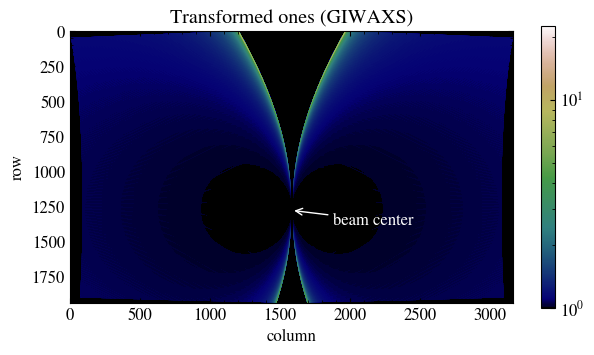

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(6.5, 4), facecolor="w")
ax.set_facecolor("k")
pos = ax.imshow(transformed_WAXS, norm=LogNorm(1, transformed_WAXS.max()), cmap='gist_earth')
ax.set_title("Transformed ones (GIWAXS)")
ax.set_xlabel("column")
ax.set_ylabel("row")
ax.annotate('beam center', (beam_center[1], beam_center[0]), color='white', fontsize=12,
            xytext=(beam_center[1] + 300, beam_center[0] + 100),
            arrowprops=dict(facecolor='white', edgecolor='white', arrowstyle='->'))
fig.colorbar(pos, ax=ax, shrink=0.8)
fig.tight_layout()
fig.savefig(img_dir / "GIWAXS-transform.png", dpi=600)

# Solid-angle correction

In [22]:
flat_data = np.ones((2000, 3000))

pixel = 75e-6
poni1 = 0.05
poni2 = 0.1125
det_dist = 0.15
incident_angle = np.radians(.3)
tilt_angle = 0
critical_angle = 0

transformed_WAXS, _, new_poni = gixpy.transform(flat_data, flat_data, pixel, pixel, poni1, poni2,
                                                det_dist, incident_angle, tilt_angle, critical_angle)

beam_center = gixpy.poni.convert_from(new_poni, pixel, transformed_WAXS.shape)
print(beam_center)

Loaded image and flat field with shape (2000, 3000).
Transformed beam center: (1277.68, 1581.06) pixels
Found new locations for pixels.
Output images will have shape (1936, 3164)
Initializing transformed image with dimension 2: (1936, 3164)
[1277.68181548 1581.05708163]


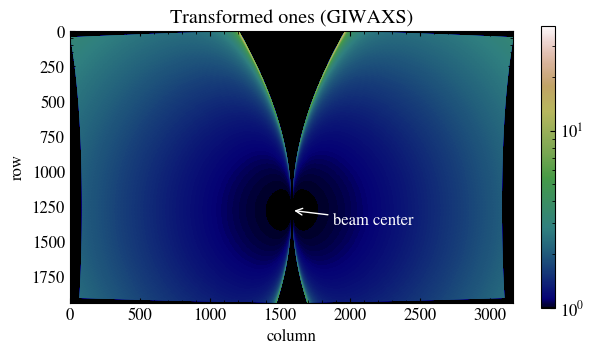

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6.5, 4), facecolor="w")
ax.set_facecolor("k")
pos = ax.imshow(transformed_WAXS, norm=LogNorm(1, transformed_WAXS.max()), cmap='gist_earth')
ax.set_title("Transformed ones with solid angle correction (GIWAXS)")
ax.set_xlabel("column")
ax.set_ylabel("row")
ax.annotate('beam center', (beam_center[1], beam_center[0]), color='white', fontsize=12,
            xytext=(beam_center[1] + 300, beam_center[0] + 100),
            arrowprops=dict(facecolor='white', edgecolor='white', arrowstyle='->'))
fig.colorbar(pos, ax=ax, shrink=0.8)
fig.tight_layout()
fig.savefig(img_dir / "GIWAXS-transform-SAC.png", dpi=600)

# GISAXS

In [24]:
flat_data = np.ones((2000, 3000))

pixel = 75e-6
poni1 = 0.05
poni2 = 0.1125
det_dist = 5
incident_angle = np.radians(.3)
tilt_angle = 0
critical_angle = 0

transformed_SAXS, _, new_poni = gixpy.transform(flat_data, flat_data, pixel, pixel, poni1, poni2,
                                                det_dist, incident_angle, tilt_angle, critical_angle, 0)

#transformed = np.where(transformed == 0, np.nan, transformed)
print(transformed_SAXS.max())

Loaded image and flat field with shape (2000, 3000).
Transformed beam center: (1332.82, 1499.57) pixels
Found new locations for pixels.
Output images will have shape (2000, 3001)
Initializing transformed image with dimension 2: (2000, 3001)
2.826174542287777


[1332.82228514 1499.57340442]


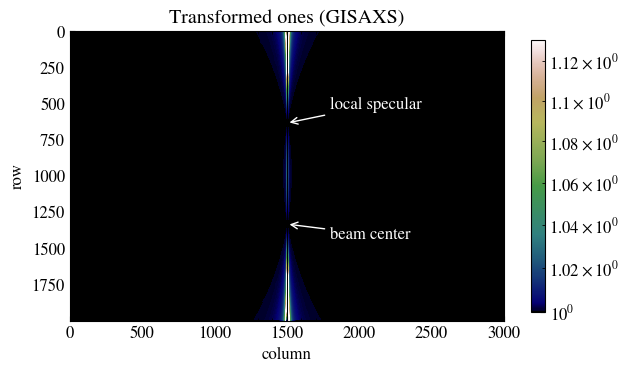

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(6.5, 4), facecolor="w")
ax.set_facecolor("k")
pos = ax.imshow(transformed_SAXS, norm=LogNorm(1, transformed_SAXS.max() * .4), cmap='gist_earth')
ax.set_title("Transformed ones (GISAXS)")
ax.set_xlabel("column")
ax.set_ylabel("row")
cbar = fig.colorbar(pos, ax=ax, shrink=0.8)

beam_center = gixpy.poni.convert_from(new_poni, pixel, transformed_SAXS.shape)
print(beam_center)

ax.annotate('beam center', (beam_center[1], beam_center[0]), color='white', fontsize=12,
            xytext=(beam_center[1] + 300, beam_center[0] + 100),
            arrowprops=dict(facecolor='white', edgecolor='white', arrowstyle='->'))

local_specular = beam_center[0] - det_dist / pixel * np.tan(2 * incident_angle)

ax.annotate('local specular', (beam_center[1], local_specular), color='white', fontsize=12,
            xytext=(beam_center[1] + 300, local_specular - 100),
            arrowprops=dict(facecolor='white', edgecolor='white', arrowstyle='->'))

fig.tight_layout()
fig.savefig(img_dir / "GISAXS-transform.png", dpi=600)

# Local Specular

In [26]:
flat_data = np.ones((2000, 3000))

pixel = 75e-6
poni1 = 0.05
poni2 = 0.1125
det_dist = 0.15
incident_angle = np.radians(10)
tilt_angle = 0
critical_angle = 0

transformed_LS, _, new_poni = gixpy.transform(flat_data, flat_data, pixel, pixel, poni1, poni2,
                                              det_dist, incident_angle, tilt_angle, critical_angle, 0)

beam_center = gixpy.poni.convert_from(new_poni, pixel, transformed_LS.shape)
print(beam_center)

local_specular = beam_center[0] - det_dist / pixel * np.tan(2 * incident_angle)

Loaded image and flat field with shape (2000, 3000).
Transformed beam center: (1345.85, 1555.65) pixels
Found new locations for pixels.
Output images will have shape (1976, 3113)
Initializing transformed image with dimension 2: (1976, 3113)
[1345.84774414 1555.65346674]


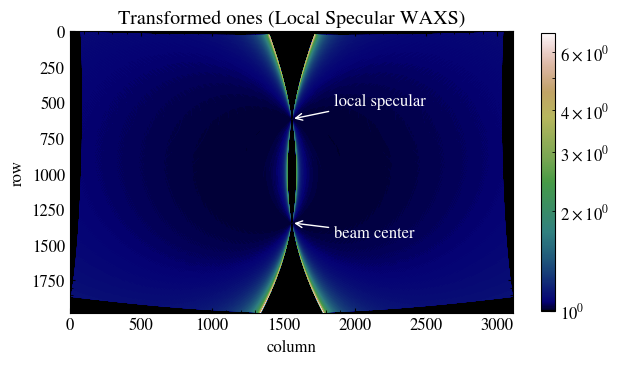

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(6.5, 4), facecolor="w")
ax.set_facecolor("k")
pos = ax.imshow(transformed_LS, norm=LogNorm(1, transformed_LS.max() * .4), cmap='gist_earth')
ax.set_title("Transformed ones (Local Specular WAXS)")
ax.set_xlabel("column")
ax.set_ylabel("row")

ax.annotate('beam center', (beam_center[1], beam_center[0]), color='white', fontsize=12,
            xytext=(beam_center[1] + 300, beam_center[0] + 100),
            arrowprops=dict(facecolor='white', edgecolor='white', arrowstyle='->'))

ax.annotate('local specular', (beam_center[1], local_specular), color='white', fontsize=12,
            xytext=(beam_center[1] + 300, local_specular - 100),
            arrowprops=dict(facecolor='white', edgecolor='white', arrowstyle='->'))
fig.colorbar(pos, ax=ax, shrink=0.8)
fig.tight_layout()
fig.savefig(img_dir / "LSWAXS-transform.png", dpi=600)